# Neural Network practice - Classification and Regression

The University of California, Irvine - UCI - is a well-known repository that concentrates a lot of free-use datasets for machine learning applications and research

https://archive.ics.uci.edu/ml/index.php

In [ ]:
'''
    Proyecto: Proyecto 2º Parcial: Busquedas Informadas
    Universidad Panamericana
    Clase de Inteligencia Artificial
    Alejandro Laphond Payan
    Mauricio Moscoso Mandujano
    Fernando Ruiz de Huidobro Zapata
    31-mayo-2023
    version 1.1

    El presente código presente  

    Ejecucion del programa: 
    Para la ejecución del código es necesario tener una interfaz de notebook. La recomendada por los autores son: Google Collaborator pero puede usar la de su preferencia. 
    Es posible ejecutar celda por celda para analizar los datos de salida de cada celda o correr todos 
    simultáneamente y analizar en conjunto todas las celdas. Es importante recalcar que las celdas deben de ser ejecutadas en el orden que están en el 
    documento, ya que de lo contrario no se ejecutara correctamente. Igualmente es necesario subir manualmente las bases de datos a la interfaz de notebook 
    que fue utilizada para que pueda ser ejecutada.


    
    Entradas:
        El codigo recibe como entrada las dos bases de datos adjuntas en el zip, pero deben de ser agregadas manualmente
    
    Salidas:
        Cada celda tiene una salida diferente, se pueden correr todas al mismo tiempo o una a una.
'''

In [ ]:
###############################
###############################
##### Dependencias #####

# Bibliotecas para manipular la información y visualizarla
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Biblioteca para las redes nueronales
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# las metricas para clasificación
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

# las metricas para regresión
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from math import sqrt
import seaborn as sn

# para Hypertunning
from sklearn.model_selection import GridSearchCV

# para poder leer cvs, y guardarlo dentro de un dataframe de pandas
from pandas.io.parsers.readers import ReadCsvBuffer

In [ ]:
"""
VARIABLES GLOBALES
dataset_class:      Esta variable contiene la información de 'Dry_Bean_Dataset.xlsx' y de la hoja 'Dry_Beans_Dataset',
                    que se va utilizar para clasificar los distintos tipos de frijoles.

dataset_reg:        Esta variable contiene la informaición de 'Metro_Interstate_Traffic_Volume' en la cual vamos a aplicar 
                    la regresión para predecir el volúmen del tráfico.

X:          Se refiere al dataset no va a tener nuestro parametro de interes en cada caso, el que queremos clasificar o predecir.
y:          Se refiere al dataset que solo contiene el parametro de interes

X_train:    Se refiere a la partición de X, talque se va a utilizar durante el aprendizaje en el caso que se aplica al caso de clasificación
X_train_scaled: Es la versión a escala de X_train

y_train:    Se refiere a la partición de y, que funcionan como las respuestas durante el aprendizaje

X_test:     Se refiere a la partición de X, talque se va a utilizar durante el testeo
X_test_scaled:  Es la versión a escala de X_test

y_test:     Se refiere a la partición de y, que funcionan como las respuestas durante el testeo
y_pred:     Se refiere a lo que cree la red neuronal cree que es el resultado, despues se va a compara con y_test, para ver que tanto
            aprendió la red neuronal, en el caso de clasificación. 
X_train_2:      Se refiere a la partición de X, talque se va a utilizar durante el aprendizaje en el caso que se aplica al caso de regresión.
X_train_scaled_2: Es la versión a escala de X_train

y_train_2:      Se refiere a la partición de y, que funcionan como las respuestas durante el aprendizaje, en el de regresión

X_test_2:       Se refiere a la partición de X, talque se va a utilizar durante el testeo, en el de regresión 
X_test_scaled_2:  Es la versión a escala de X_test_2

y_test_2:     Se refiere a la partición de y, que funcionan como las respuestas durante el testeo, en el de regresión
y_pred_2:     Se refiere a lo que cree la red neuronal cree que es el resultado, despues se va a compara con y_test, para ver que tanto
              aprendió la red neuronal, en el caso de regresión. 


A continuación se muestra una lista con las funciones de apoyo y con las funciones principales. Se incluye una breve descripción, mas adelante
se explicaran con más detalle.

FUNCIONES O CLASES DE APOYO:
    - coder:  Este codificador lo que hace es checar si lo que recibió es igual al string "None", si es 
              igual regresa un 0, en caso contrario 1, pero nos sirve para transformar una columna en datos númericos
    - coder2: Este codificador lo que hace es transformar ciertos tipos de clima a valor númerico, para no tener que trabajar con strings

"""


## Import the data, prepare and visualise it

In the iris.names file it is described the details of the dataset, including the attribute Information:

   1. Class:
        1,
        2,
        3
   2. Alcohol
   3. Malic acid
   4. Ash
   5. Alcalinity of ash 
   6. Magnesium
   7. Total phenols
   8. Flavanoids
   9. Nonflavanoid phenols
   10. Proanthocyanins
   11. Color intensity
   12. Hue
   13. OD280/OD315 of diluted wines
   14. Proline

In [ ]:
# guardar la información un dataframe de pandas
dataset_class = pd.read_excel(io = '/content/Dry_Bean_Dataset.xlsx', sheet_name= 'Dry_Beans_Dataset')

print('The dataset contains {} observations and {} features\n'.format(dataset_class.shape[0],dataset_class.shape[1]))

dataset_class.head()

The dataset contains 13611 observations and 17 features



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
# Checar cuantas instancias tenemos para cada clase
dataset_class.groupby('Class').size()

Class
BARBUNYA    1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1928
SEKER       2027
SIRA        2636
dtype: int64

In [ ]:
# Usar el análisis de los 5 números para entender mejor la información
dataset_class.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


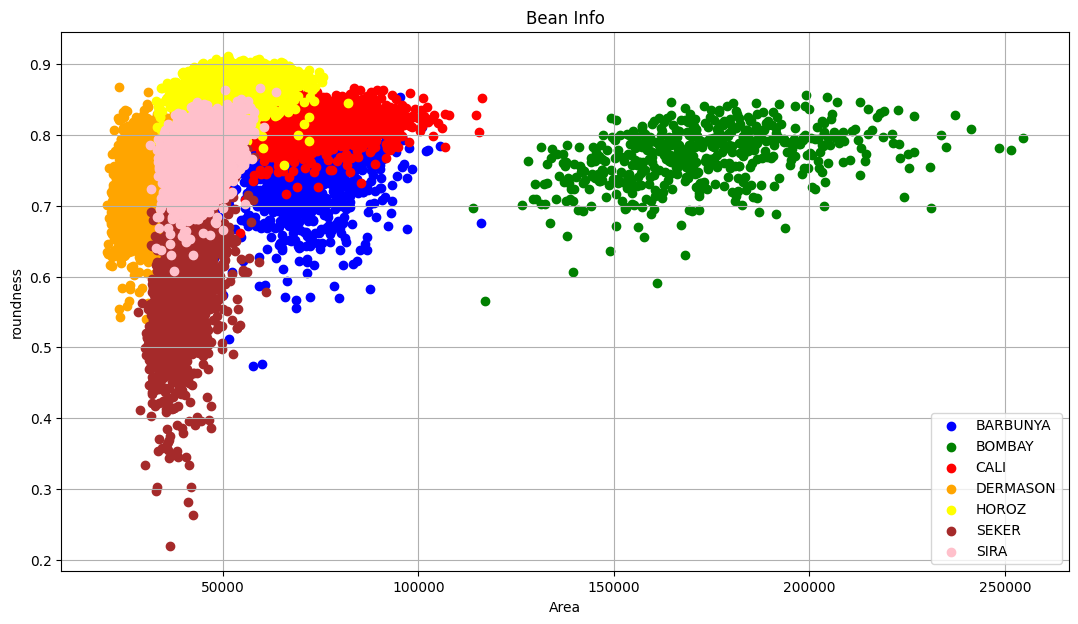

In [ ]:
### visualizar los datos
# Separar por cada tipo de clase

BARBUNYA = dataset_class[dataset_class.Class == 'BARBUNYA']
BOMBAY = dataset_class[dataset_class.Class=='BOMBAY']
CALI = dataset_class[dataset_class.Class=='CALI']
DERMASON = dataset_class[dataset_class.Class=='DERMASON']
HOROZ = dataset_class[dataset_class.Class=='HOROZ']
SEKER = dataset_class[dataset_class.Class=='SEKER']
SIRA = dataset_class[dataset_class.Class=='SIRA']


fig, ax = plt.subplots()
fig.set_size_inches(13, 7) 

# etiquetas y puntos de dispersión
ax.scatter(BARBUNYA['Area'], BARBUNYA['Eccentricity'], label="BARBUNYA", facecolor="blue")
ax.scatter(BOMBAY['Area'], BOMBAY['Eccentricity'], label="BOMBAY", facecolor="green")
ax.scatter(CALI['Area'], CALI['Eccentricity'], label="CALI", facecolor="red")
ax.scatter(DERMASON['Area'], DERMASON['Eccentricity'], label="DERMASON", facecolor="orange")
ax.scatter(HOROZ['Area'], HOROZ['Eccentricity'], label="HOROZ", facecolor="yellow")
ax.scatter(SEKER['Area'], SEKER['Eccentricity'], label="SEKER", facecolor="brown")
ax.scatter(SIRA['Area'], SIRA['Eccentricity'], label="SIRA", facecolor="pink")


ax.set_xlabel("Area")
ax.set_ylabel("roundness")
ax.grid()
ax.set_title("Bean Info")
ax.legend()

## Generating the Training and Testing datasets

In [ ]:
### Quitar el tipo de clase ya que es lo que nos interesa

# Como X es nuestro dataframe sin la clase
X = dataset_class.drop('Class', axis=1)
X = X.to_numpy()[:, (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)]

# y tiene la clase de cada frijol
y = dataset_class['Class']

# Separar en entrenamiento y para comprobar que aprendió
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
print('Min values of the dataset are: \n{}'.format(dataset_class.min()))
print('Max values of the dataset are: \n{}'.format(dataset_class.max()))

# Necesitamos modificar la escala de nuestro datos ya que estan a distintas escalas
sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled.max()))

Min values of the dataset are: 
Area                    20420
Perimeter             524.736
MajorAxisLength    183.601165
MinorAxisLength    122.512653
AspectRation         1.024868
Eccentricity         0.218951
ConvexArea              20684
EquivDiameter      161.243764
Extent               0.555315
Solidity             0.919246
roundness            0.489618
Compactness          0.640577
ShapeFactor1         0.002778
ShapeFactor2         0.000564
ShapeFactor3         0.410339
ShapeFactor4         0.947687
Class                BARBUNYA
dtype: object
Max values of the dataset are: 
Area                   254616
Perimeter             1985.37
MajorAxisLength    738.860153
MinorAxisLength    460.198497
AspectRation         2.430306
Eccentricity         0.911423
ConvexArea             263261
EquivDiameter      569.374358
Extent               0.866195
Solidity             0.994677
roundness            0.990685
Compactness          0.987303
ShapeFactor1         0.010451
ShapeFactor2         0

## Classification

In [ ]:
mlp_clf = MLPClassifier(
    # Definimos las capas, y cuantas neuronas por capa
    hidden_layer_sizes = (16,100,150,100, 7), #Selected number of layers because the optimum seemed to be when the outer layers have the same number of neurons as atributes in the data base or categories to be clasified. Suggested: Three inner layers.
    # el máximo número de iteraciones para el optimizador
    max_iter = 300,
    # Funcipon de activación
    activation = 'relu',
    
    solver = 'adam'
    )

### Training

In [ ]:
# entrenando el modelo
mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(16, 100, 150, 100, 7), max_iter=300)

### Testing

In [ ]:
# Le pasamos los datos que guardamos para el testeo
y_pred = mlp_clf.predict(X_test_scaled)
y_pred

array(['SEKER', 'BARBUNYA', 'SEKER', ..., 'DERMASON', 'CALI', 'DERMASON'],
      dtype='<U8')

### Evaluation

In [ ]:

# Precisión obtenida por la red nueronal
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
# exactitud, memoria, f1-score, y support
print(classification_report(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

    BARBUNYA       0.89      0.93      0.91       261
      BOMBAY       0.99      1.00      1.00       117
        CALI       0.95      0.90      0.93       317
    DERMASON       0.90      0.88      0.89       671
       HOROZ       0.96      0.95      0.95       408
       SEKER       0.95      0.94      0.94       413
        SIRA       0.83      0.88      0.85       536

    accuracy                           0.91      2723
   macro avg       0.93      0.93      0.92      2723
weighted avg       0.91      0.91      0.91      2723



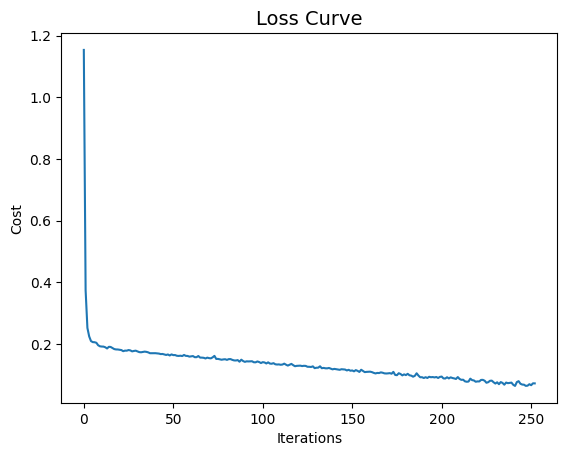

In [ ]:
# Ver como se entreno el modelo
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

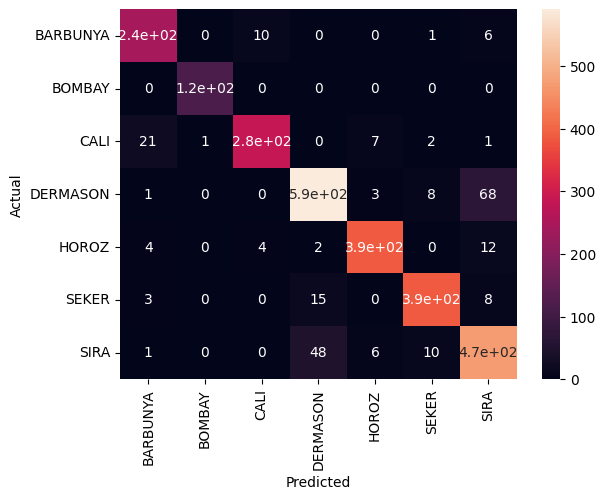

In [ ]:
### Ver que tan bien se testeo el modelo

# Generar la matriz de confusión
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
# veamos como se ven las predicciones
y_pred_pd = pd.DataFrame(y_pred)
print('Predictions \n{}\n'.format(y_pred_pd.describe()))

# veamos como se ven los resultados verdaderos
print('Groundtruth \n{}'.format(y_test.describe()))

Predictions 
               0
count       2723
unique         7
top     DERMASON
freq         656

Groundtruth 
count         2723
unique           7
top       DERMASON
freq           671
Name: Class, dtype: object


## Hyper parameter Tuning

In [ ]:

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80),(100)], #Selected layers always trying to mantain the outer layers with the same number of neurons as atributes in the data base or categories to be clasified.
    'max_iter': [100,50, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd','adam'],
    'alpha': [0.05,0.0001],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
grid = GridSearchCV(
    mlp_clf,
    param_grid,
    n_jobs = -1,
    cv = 5
    )

In [ ]:
# ejecutar este chequeo para los hiperparametros
grid.fit(X_train_scaled, y_train)

In [ ]:
# Conseguir los mejores valores para cada hiper parametro checado
print('The best hyper parameter values are:\n{}'.format(grid.best_params_))

In [ ]:
# guardar los resultados como un dataframe para poder verlo más facil
grid_results = pd.DataFrame(grid.cv_results_)

In [ ]:
# mostrar los resultados de la busqueda por red de hiper parametros por mejor puntuación
grid_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
45,0.338003,0.008354,0.001773,0.000081,tanh,0.05,"(150, 100, 50)",adaptive,100,adam,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",1.000000,0.965517,0.964286,1.000000,1.000000,0.985961,0.017199,1
5,0.342501,0.008465,0.001593,0.000043,tanh,0.0001,"(150, 100, 50)",constant,150,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",1.000000,0.965517,0.964286,1.000000,1.000000,0.985961,0.017199,1
41,0.434810,0.036206,0.001633,0.000142,tanh,0.05,"(150, 100, 50)",constant,150,adam,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",1.000000,0.931034,0.964286,1.000000,1.000000,0.979064,0.027713,3
17,0.341803,0.010991,0.001594,0.000239,tanh,0.0001,"(120, 80)",constant,150,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",1.000000,0.931034,0.964286,1.000000,1.000000,0.979064,0.027713,3
15,0.211933,0.003216,0.001548,0.000154,tanh,0.0001,"(120, 80)",constant,100,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",1.000000,0.931034,0.964286,1.000000,1.000000,0.979064,0.027713,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.085257,0.009099,0.001681,0.000181,relu,0.0001,"(120, 80)",adaptive,50,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.896552,0.620690,0.857143,0.892857,0.928571,0.839163,0.111557,140
72,0.117538,0.011541,0.001627,0.000386,relu,0.0001,"(150, 100, 50)",constant,50,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.793103,0.758621,0.892857,0.821429,0.928571,0.838916,0.062928,141
102,0.083445,0.003273,0.001182,0.000034,relu,0.0001,100,adaptive,50,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.827586,0.827586,0.821429,0.821429,0.857143,0.831034,0.013341,142
108,0.122142,0.001636,0.001532,0.000177,relu,0.05,"(150, 100, 50)",constant,50,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.758621,0.965517,0.857143,0.678571,0.785714,0.809113,0.096858,143


Evaluación de la mejor 

A continuación se hace la misma evaluación pero ahora sobre la mejor red que resulto de los hiperparametros dados

In [ ]:
#A continuación se va a hacer una evaluación del mejor resultado de los hiperparametros con las mismas métricas antes vistas.

mlp_clf_optimo = MLPClassifier(
    # Definimos las capas, y cuantas neuronas por capa
    hidden_layer_sizes = (150,100, 50), #Selected number of layers because the optimum seemed to be when the outer layers have the same number of neurons as atributes in the data base or categories to be clasified. Suggested: Three inner layers.
    # el máximo número de iteraciones para el optimizador
    max_iter = 100,
    # Funcipon de activación
    activation = 'tanh',
    
    solver = 'adam',
    alpha = 0.05,
    learning_rate='adaptive'
    )


In [ ]:
# entrenando el modelo
mlp_clf_optimo.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(150, 100, 50),
              learning_rate='adaptive', max_iter=100)

In [ ]:
# Le pasamos los datos que guardamos para el testeo
y_pred_optimo_1 = mlp_clf_optimo.predict(X_test_scaled)
y_pred_optimo_1

array(['SEKER', 'BARBUNYA', 'SEKER', ..., 'DERMASON', 'CALI', 'DERMASON'],
      dtype='<U8')

In [ ]:
# Precisión obtenida por la red nueronal
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_optimo_1)))
# exactitud, memoria, f1-score, y support
print(classification_report(y_test, y_pred_optimo_1))

Accuracy: 0.93
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.93      0.93       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.95      0.95       317
    DERMASON       0.92      0.91      0.92       671
       HOROZ       0.98      0.93      0.95       408
       SEKER       0.95      0.96      0.96       413
        SIRA       0.87      0.91      0.89       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



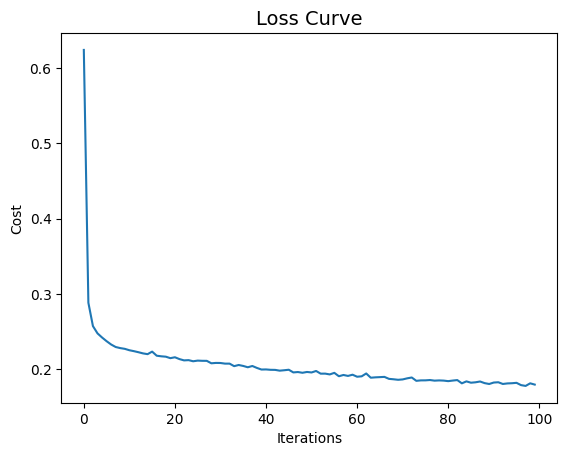

In [ ]:
# Ver como se entreno el modelo
plt.plot(mlp_clf_optimo.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

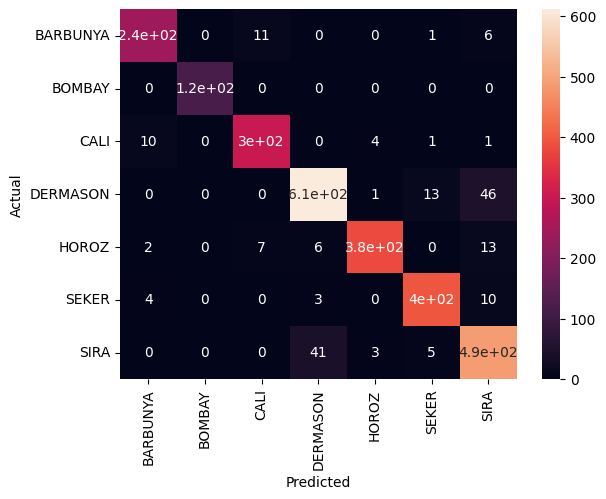

In [ ]:
### Ver que tan bien se testeo el modelo

# Generar la matriz de confusión
confusion_matrix_optimo = pd.crosstab(y_test, y_pred_optimo_1, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix_optimo, annot=True)
plt.show()

## Regression

In [ ]:
# guardar la información un dataframe de pandas
dataset_reg = pd.read_csv(filepath_or_buffer='/content/Metro_Interstate_Traffic_Volume.csv') 

print('The dataset contains {} observations and {} features\n'.format(dataset_reg.shape[0],dataset_reg.shape[1]))

dataset_reg.head()

FileNotFoundError: ignored

Regression only works with numeric values.

Let's take a look at the original dataset one more time.

As we can see, the species values are not adequate for this purpose; at least, not until we code them

In [ ]:
# checa si recibio "None" para transformarlo en valor númerico
# entrada:
#   holiday = string que representa si en un dia dado fue festivo
# salida:
#   1, 0 dependiendo de la comparación
def coder(holiday):
    if holiday == 'None':
        return 0
    else:
        return 1

# aplicar coder a la columna "holiday"
dataset_reg['holiday'] = dataset_reg['holiday'].apply(coder)

# checa que tipo de clima recibio para transformarlo en un valor númerico
# entrada:
#   weather_main = string que representa que tipo de clima fue
# salida:
#   0- 9: dependiendo de la comparación
def coder2(weather_main):
  if weather_main == 'Clouds':
        return 0
  elif weather_main == 'Rain':
        return 1
  elif weather_main == 'Clear':
        return 2
  elif weather_main == 'Drizzel':
        return 3
  elif weather_main == 'Mist':
        return 4
  elif weather_main == 'Haze':
        return 5
  elif weather_main == 'Fog':
        return 6
  elif weather_main == 'Thunderstorm':
        return 7
  elif weather_main == 'Snow':
        return 8
  elif weather_main == 'Smoke':
        return 9
  elif weather_main == 'Squall':
        return 10

# aplicar el coder2 a la columna "weather_main"
dataset_reg['weather_main'] = dataset_reg['weather_main'].apply(coder2)

NameError: ignored

In [ ]:
dataset_reg.groupby('weather_main').size()

weather_main
0.0     15164
1.0      5672
2.0     13391
4.0      5950
5.0      1360
6.0       912
7.0      1034
8.0      2876
9.0        20
10.0        4
dtype: int64

In [ ]:
dataset_reg.groupby('holiday').size()

holiday
0    48143
1       61
dtype: int64

In [ ]:
#quitar todos los vacios
dataset_reg = dataset_reg.dropna()

NameError: ignored

### Generating the Training and Testing datasets

In [ ]:
### Quitar el tipo de clase ya que es lo que nos interesa

# Como X es nuestro dataframe sin el volumen del trafico
X = dataset_reg.drop('traffic_volume', axis=1)

X = X.to_numpy()[:, (1,2,3,4)]

# y tiene los datos sobre el volumen del trafico
y = dataset_reg['traffic_volume']

# Separando entre entrenamiento y prueba
# Como la información esta relacionada con el tiempo tenemos que shuffle=False, para que los ultimos datos sean los preguntados
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,test_size=0.1,random_state=42,shuffle=False)

In [ ]:
print('Min values of the dataset are: \n{}'.format(dataset_reg.min()))
print('Max values of the dataset are: \n{}'.format(dataset_reg.max()))

# Necesitamos modificar la escala de nuestro datos ya que estan a distintas escalas
sc = StandardScaler()

scaler = sc.fit(X_train_2)
X_train_scaled_2 = scaler.transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled_2.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled_2.max()))

### Defining the regression model

In [ ]:
# defining a Multi-layer Perceptron regresor
mlp_reg = MLPRegressor(
    # definiendo las capas, y sus neuronas
    hidden_layer_sizes=(4,50,100,100,150,150,150,200,200,150,150,150,100,100,50,10),
    # maximo número de iteraciones para solver
    max_iter = 400,
    # función de activación
    activation = 'relu',
    # optimizador de los pesos
    solver = 'adam'
    )

### Training

In [ ]:
# entrenando el modelo
mlp_reg.fit(X_train_scaled_2, y_train_2)

### Testing

In [ ]:
# necesitamos aplicarle el dataset que teniamos para la prueba
y_pred_2 = mlp_reg.predict(X_test_scaled_2)
y_pred_2

### Evaluation

In [ ]:
# r2
#   Best possible score is 1.0 and it can be negative 
#   (because the model can be arbitrarily worse)
print('r2: {:.2f}'.format(r2_score(y_test_2, y_pred_2)))

# mean square error
#   Best value is 0.0
print('mse: {:.2f}'.format(mean_squared_error(y_test_2, y_pred_2)))

# explained_variance_score
#   Best value is 1.0, lower values are worse
print('explained variance: {:.2f}'.format(explained_variance_score(y_test_2, y_pred_2)))

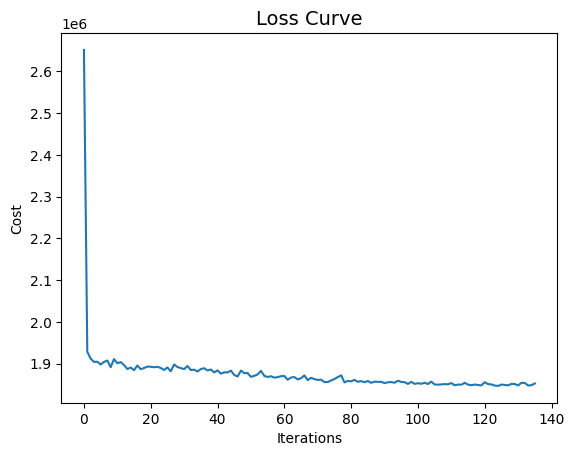

In [ ]:
# ver que tan bien aprendio el modelo
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<Axes: >

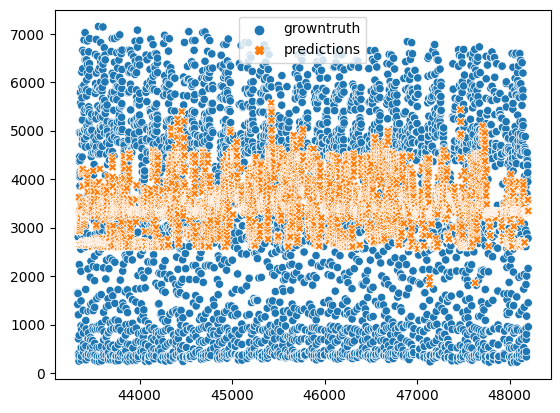

In [ ]:
### ver que tan bien fue el testeo
regression_res_df = pd.DataFrame({'growntruth': y_test_2,'predictions': y_pred_2})

sn.scatterplot(regression_res_df)

## Hyper parameter Tuning

In [ ]:
# Podemos definir los parametros que nos interesan cambiar con nuestro modelo
param_grid_2 = {
    'hidden_layer_sizes': [(4,50,100,150,200,150,100,50), (50,100,150,100,50)], 
    'max_iter': [150, 400],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant']
}

In [ ]:
# definmos una busqueda por redes para entrenear varias redes neuronales
grid_2 = GridSearchCV(
    mlp_reg,
    param_grid_2,
    n_jobs = -1,
    cv = 5
    )

In [ ]:
# Ejecutamos esto para empezar a ver cuales son los mejores hiper parametros
grid_2.fit(X_train_scaled_2, y_train_2)

GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=(4, 50, 100, 100, 150,
                                                        150, 150, 200, 200, 150,
                                                        150, 150, 100, 100, 50,
                                                        10),
                                    max_iter=400),
             n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(4, 50, 100, 150, 200, 150, 100,
                                                 50),
                                                (50, 100, 150, 100, 50)],
                         'learning_rate': ['constant'], 'max_iter': [150, 400],
                         'solver': ['adam']})

In [ ]:
# conseguimos los mejores parametros que se modificaron
print('The best hyper parameter values are:\n{}'.format(grid_2.best_params_))

The best hyper parameter values are:
{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 150, 100, 50), 'learning_rate': 'constant', 'max_iter': 400, 'solver': 'adam'}


In [ ]:
# se guardan los resultados en un dataframe para que sea mas facil interactuar con ellos
grid_results_2 = pd.DataFrame(grid_2.cv_results_)

In [ ]:
# mostrar los distintos tipos de modelos a partir de su puntaje
grid_results_2.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,178.479262,150.852279,0.378526,0.327023,relu,0.05,"(50, 100, 150, 100, 50)",constant,400,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.027624,0.066562,0.040440,0.020633,0.065203,0.044093,0.018897,1
2,132.799179,134.518080,0.170023,0.192081,relu,0.0001,"(50, 100, 150, 100, 50)",constant,150,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.023666,0.055517,0.026969,0.025094,0.068933,0.040036,0.018637,2
3,141.351199,152.386129,0.114398,0.103428,relu,0.0001,"(50, 100, 150, 100, 50)",constant,400,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.032269,0.060879,0.016453,0.021731,0.057546,0.037776,0.018259,3
0,150.828867,92.324267,0.312301,0.327968,relu,0.0001,"(4, 50, 100, 150, 200, 150, 100, 50)",constant,150,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.018192,0.064261,-0.017566,0.013687,0.068507,0.029416,0.032628,4
5,161.775953,31.474580,0.175919,0.047454,relu,0.05,"(4, 50, 100, 150, 200, 150, 100, 50)",constant,400,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.010225,0.050654,-0.391003,0.025589,0.064934,-0.047920,0.172594,5
4,292.288030,251.087301,0.892641,0.675386,relu,0.05,"(4, 50, 100, 150, 200, 150, 100, 50)",constant,150,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.013033,0.055817,-0.387676,0.018372,0.057759,-0.048539,0.170571,6
1,614.647567,494.913231,0.700430,0.571997,relu,0.0001,"(4, 50, 100, 150, 200, 150, 100, 50)",constant,400,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.020889,0.065275,-0.799450,0.025120,0.066806,-0.124272,0.338140,7
6,192.957646,132.402782,0.296309,0.194222,relu,0.05,"(50, 100, 150, 100, 50)",constant,150,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.025483,0.053947,-2.300991,0.022542,0.065579,-0.426688,0.937295,8


Evaluación de la mejor

In [ ]:
#Las siguientes funciones son iguales a las previamente utilizadas, para evaluar los resultados de la mejor de hiperparametros
#Nueva red de regresión para el mejor de los hiperparametros
mlp_reg_optimo = MLPRegressor(
    hidden_layer_sizes=(50,100,150,100,50),
    max_iter = 400,
    activation = 'relu',
    solver = 'adam',
    alpha = 0.05,
    learning_rate = 'constant'
    )

In [ ]:
mlp_reg_optimo.fit(X_train_scaled_2, y_train_2)

MLPRegressor(alpha=0.05, hidden_layer_sizes=(50, 100, 150, 100, 50),
             max_iter=400)

In [ ]:
# vemos las predicciones de la red optima
y_pred_optimo = mlp_reg_optimo.predict(X_test_scaled_2)
y_pred_optimo

array([3016.5289479 , 3016.5289479 , 3016.5289479 , ..., 3468.85020535,
       3471.05159161, 3470.94840162])

In [ ]:
print('r2: {:.2f}'.format(r2_score(y_test_2, y_pred_optimo)))

# mean square error
#   Best value is 0.0
print('mse: {:.2f}'.format(mean_squared_error(y_test_2, y_pred_optimo)))

# explained_variance_score
#   Best value is 1.0, lower values are worse
print('explained variance: {:.2f}'.format(explained_variance_score(y_test_2, y_pred_optimo)))

r2: 0.10
mse: 3509380.67
explained variance: 0.11


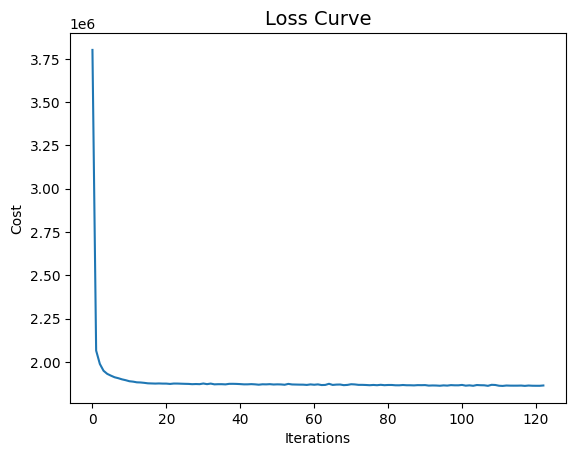

In [ ]:
# vemos que tan bien aprendio el modelo optimo
plt.plot(mlp_reg_optimo.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<Axes: >

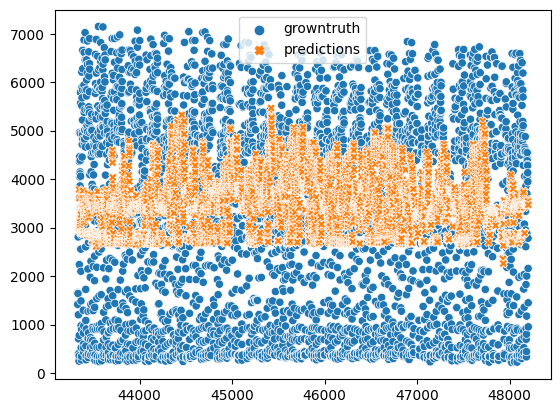

In [ ]:
#Comparamos como se comportn las predicciones por este model y contra las verdades
regression_res_df_optimo = pd.DataFrame({'growntruth': y_test_2,'predictions': y_pred_optimo})

sn.scatterplot(regression_res_df_optimo)